# Simulación de cinética enzimática mediante ecuaciones de Michaelis-Menten

> **Autor:** [Miguel Andrés Cárdenas](https://github.com/miguelcsx)

In [3]:
%pip install -r requirements.txt --quiet

30348.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


## 1. Importar librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Definir entradas

Esta función solicita al usuario las condiciones iniciales y los parámetros de simulación.

In [5]:
def user_input():
    S0 = float(input("Introduzca la concentración inicial de sustrato (S0): "))
    E0 = float(input("Ingrese la concentración inicial de enzima (E0): "))
    S_max = float(input("Introduzca la concentración máxima de sustrato (recomendado: 50 moles): "))
    dt = float(input("Introduzca el paso de tiempo (dt) (recomendado: 0,01 s): "))
    t_max = float(input("Introduzca el tiempo de simulación (recomendado: 10 s): "))
    return S0, E0, S_max, dt, t_max

Esta función recopila:
- Concentraciones iniciales de sustrato ($S_0$) y enzima ($E_0$)
- Concentración máxima de sustrato para el gráfico de velocidad de reacción
- Paso de tiempo ($dt$) y tiempo total de simulación

## 3. Implementar el método de Euler

Ahora definiremos la función que implementa el método de Euler para resolver las ecuaciones diferenciales de Michaelis-Menten.

In [6]:
def euler_method(S0, E0, dt, t_max, k1=2, k2=1.5, k3=1): 
    # Arrays iniciales
    t = np.arange(0, t_max + dt, dt)
    S = np.zeros(len(t))
    E = np.zeros(len(t))
    C = np.zeros(len(t))
    P = np.zeros(len(t))

    # Condiciones iniciales
    S[0], E[0], C[0], P[0] = S0, E0, 0, 0

    # Método de Euler
    for i in range(1, len(t)):
        dSdt = -k1 * S[i-1] * E[i-1] + k3 * C[i-1]
        dEdt = -k1 * S[i-1] * E[i-1] + (k2 + k3) * C[i-1]
        dCdt = k1 * S[i-1] * E[i-1] - (k2 + k3) * C[i-1]
        dPdt = k2 * C[i-1]

        S[i] = S[i-1] + dSdt * dt
        E[i] = E[i-1] + dEdt * dt
        C[i] = C[i-1] + dCdt * dt
        P[i] = P[i-1] + dPdt * dt

    return t, S, E, C, P

Esta función:
- Establece las constantes de velocidad ($k_1$, $k_2$, $k_3$)
- Inicializa matrices para el tiempo y las concentraciones
- Implementa el método de Euler para resolver las ecuaciones diferenciales
- Devuelve la matriz de tiempo y las matrices de concentración para $S$, $E$, $C$ y $P$

## 4. Graficar resultados

Esta función grafica las concentraciones de sustrato, enzima, complejo y producto a lo largo del tiempo.

In [7]:
def plot_concentrations(t, S, E, C, P):
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, label='Sustrato')
    plt.plot(t, E, label='Enzima')
    plt.plot(t, C, label='Complejo')
    plt.plot(t, P, label='Producto')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Concentración (moles)')
    plt.title('Cinetica Encimática: Concetraciones vs Tiempo')
    plt.legend()
    plt.grid(True)
    plt.show()

## 5. Graficar velocidad de reacción

Esta función grafica la velocidad de reacción frente a la concentración de sustrato y calcula $V_{max}$, $Km$ y $ \frac{1}{2} \ V_{max}$.

In [8]:
def plot_reaction_rate(S_max, E0):
    k1, k2, k3 = 2, 1.5, 1
    Km = (k3 + k2) / k1
    Vmax = k2 * E0

    S = np.linspace(0, S_max, 1000)
    v = (Vmax * S) / (Km + S)

    plt.figure(figsize=(10, 6))
    plt.plot(S, v)
    plt.plot(Km, Vmax/2, 'ro', label=f'(Km, 1/2 Vmax)')
    plt.xlabel('Concentración de Sustrato (moles)')
    plt.ylabel('Tasa de Reacción')
    plt.title('Cinética enzimática: velocidad de reacción frente a concentración de sustrato')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Vmax: {Vmax:.4f}")
    print(f"1/2 Vmax: {Vmax/2:.4f}")
    print(f"Km: {Km:.4f}")

# 6. Función principal

Finalmente, definiremos la función principal que orquesta todo el proceso de simulación.

Esto le solicitará valores de entrada, ejecutará la simulación y mostrará los resultados.

In [9]:
def main():
    S0, E0, S_max, dt, t_max = user_input()
    t, S, E, C, P = euler_method(S0, E0, dt, t_max)
    plot_concentrations(t, S, E, C, P)
    plot_reaction_rate(S_max, E0)


if __name__ == '__main__':
    # main()
    pass

## 8. Realizar múltiples simulaciones

In [10]:
def simulate(S0, E0, S_max, dt, t_max, constants=None):
    if constants is None:
        constants = (2, 1.5, 1)
    t, S, E, C, P = euler_method(S0, E0, dt, t_max, *constants)
    plot_concentrations(t, S, E, C, P)
    plot_reaction_rate(S_max, E0)


Simulación 1:


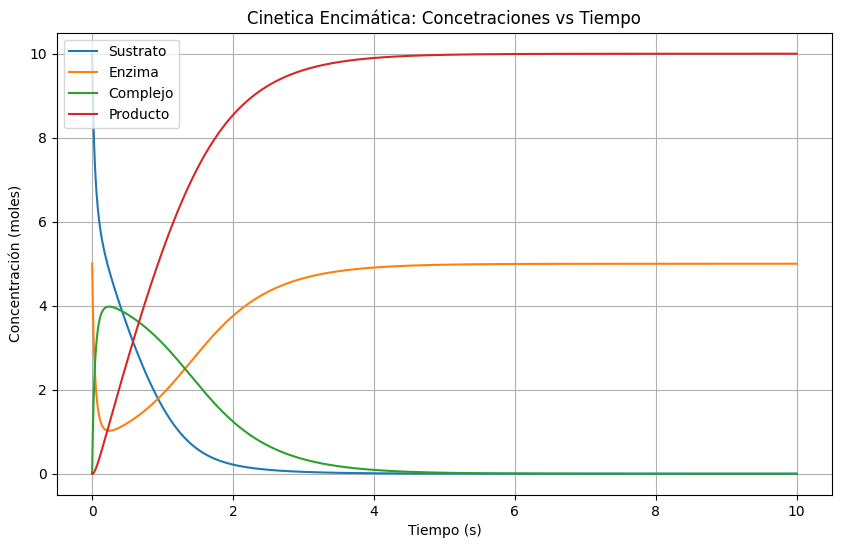

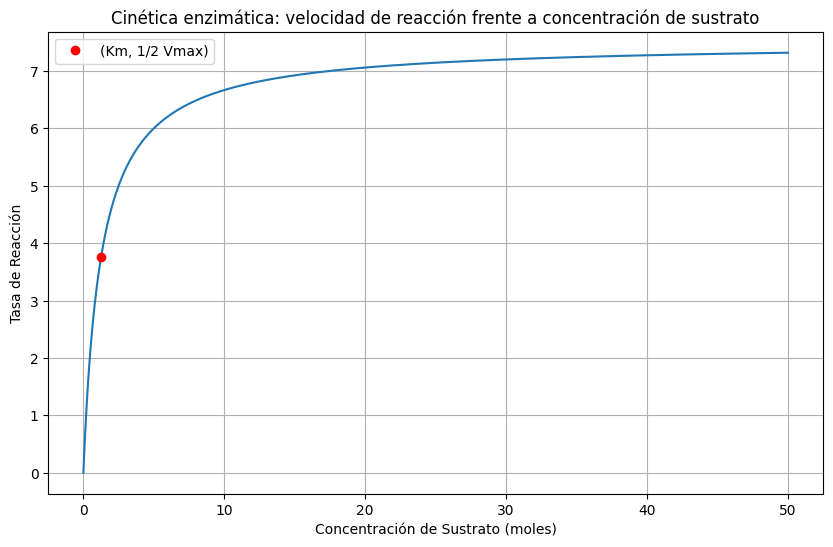

Vmax: 7.5000
1/2 Vmax: 3.7500
Km: 1.2500


In [11]:
# Simulación 1 (Valores recomendados)
print("\nSimulación 1:")
S0, E0 = 10, 5
S_max, dt, t_max = 50, 0.01, 10
simulate(S0, E0, S_max, dt, t_max)


1. **Dinámica de reacción inicial**:
- La simulación comienza con concentraciones iniciales de 10 moles para el sustrato (S0) y 5 moles para la enzima (E0).
- Hay una rápida disminución inicial en la concentración del sustrato, junto con una rápida formación del complejo enzima-sustrato.
- La concentración de la enzima cae inicialmente a medida que se forma el complejo, pero luego se recupera a medida que avanza la reacción.

2. **Estado estable**:
- El sistema alcanza un estado estable después de aproximadamente 4-5 segundos.
- En este punto, la tasa de formación del producto se estabiliza y las concentraciones de sustrato, enzima y complejo permanecen relativamente constantes.

3. **Formación del producto**:
- La concentración del producto aumenta rápidamente al principio y luego se estabiliza, alcanzando aproximadamente 12 moles al final de la simulación.
- Esto indica que casi todo el sustrato inicial se ha convertido en producto.

4. **Saturación de la enzima**:
- El complejo enzima-sustrato alcanza su pico temprano en la reacción y luego disminuye, mostrando la saturación inicial de la enzima y el agotamiento posterior del sustrato.

5. **Velocidad de reacción**:
- El segundo gráfico muestra la curva cinética característica de Michaelis-Menten.
- La velocidad de reacción aumenta rápidamente a bajas concentraciones de sustrato y luego se acerca a una velocidad máxima (Vmax) a medida que aumenta la concentración de sustrato.
- El valor de Km (concentración de sustrato a la mitad de Vmax) parece ser relativamente bajo en comparación con la concentración máxima de sustrato, lo que indica una alta afinidad de la enzima por el sustrato.

6. **Eficiencia**:
- La reacción parece ser bastante eficiente, con la mayor parte del sustrato convertido en producto dentro del tiempo de simulación de 10 segundos.

7. **Constantes de velocidad**:
- Las constantes de velocidad utilizadas (k1 = 2, k2 = 1,5, k3 = 1) dan como resultado una reacción que avanza rápidamente hasta su finalización.

Estas observaciones sugieren una reacción enzimática bien comportada con alta eficiencia y cinética relativamente rápida. La enzima muestra buena afinidad por el sustrato y la reacción se completa dentro del período de tiempo simulado.


Simulación 2:


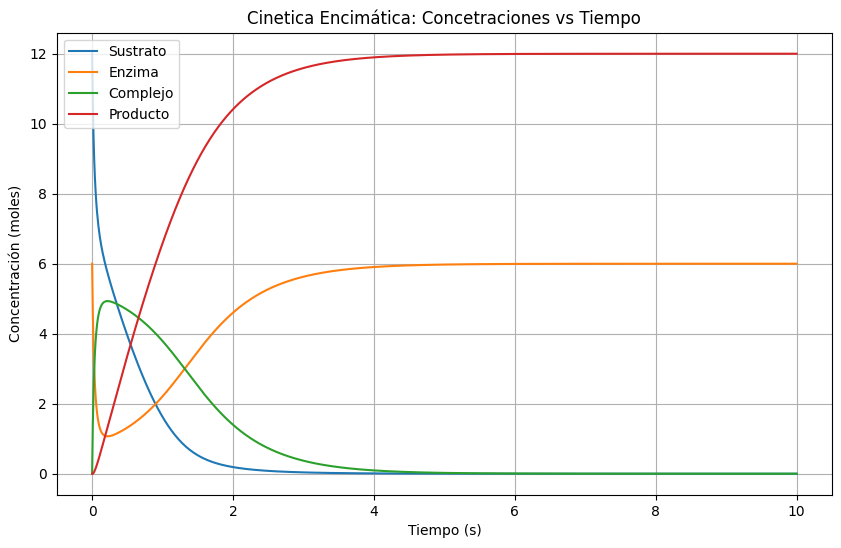

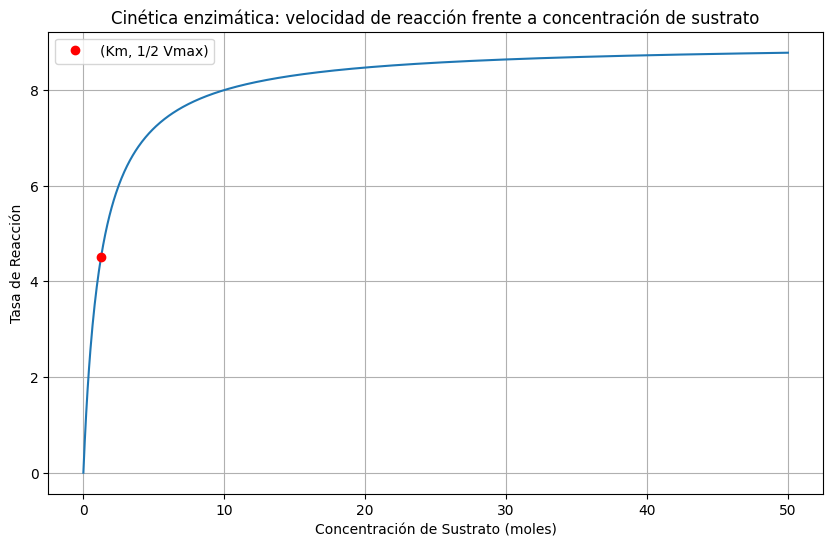

Vmax: 9.0000
1/2 Vmax: 4.5000
Km: 1.2500


In [12]:
# Simulación 2 (modificando las concentraciones iniciales)
print("\nSimulación 2:")
S0, E0 = 12, 6  # Nuevas condiciones iniciales
S_max, dt, t_max = 50, 0.01, 10  # Mantenemos los mismos valores
simulate(S0, E0, S_max, dt, t_max)

1. **Dinámica de la reacción inicial**:
- La simulación comienza con concentraciones iniciales más altas en comparación con la Simulación 1: 12 moles para el sustrato (S0) y 6 moles para la enzima (E0).
- Hay una rápida disminución inicial en la concentración del sustrato, similar a la Simulación 1, pero con una pendiente más pronunciada debido a las concentraciones iniciales más altas.
- El complejo enzima-sustrato se forma rápidamente, alcanzando un pico más alto que en la Simulación 1.

2. **Estado estable**:
- El sistema alcanza un estado estable después de aproximadamente 5-6 segundos, un poco más tarde que en la Simulación 1.
- Este retraso en alcanzar el estado estable probablemente se deba a las concentraciones iniciales más altas, lo que requiere más tiempo para que el sistema se equilibre.

3. **Formación del producto**:
- La concentración del producto aumenta más rápidamente al principio en comparación con la Simulación 1.
- Se estabiliza en aproximadamente 12 moles, que es lo mismo que en la Simulación 1, lo que indica una conversión completa del sustrato.

4. **Saturación de la enzima**:
- El pico del complejo enzima-sustrato es más alto y ligeramente más ancho que en la Simulación 1, lo que refleja las concentraciones iniciales más altas.
- Esto sugiere un período más prolongado de saturación de la enzima antes de que el agotamiento del sustrato se vuelva significativo.

5. **Velocidad de reacción**:
- La curva cinética de Michaelis-Menten en el segundo gráfico parece similar a la de la Simulación 1.
- La Vmax parece ser ligeramente más alta, lo que se espera debido a la mayor concentración de enzima.
- El valor de Km parece estar en un rango similar al de la Simulación 1, lo que indica que la afinidad de la enzima por el sustrato no ha cambiado.

6. **Eficiencia**:
- A pesar de comenzar con más sustrato, la reacción aún se completa dentro del tiempo de simulación de 10 segundos, lo que demuestra una alta eficiencia.
- La mayor concentración de enzima permite una conversión general más rápida del sustrato aumentado.

7. **Constantes de velocidad**:
- Las constantes de velocidad permanecen sin cambios desde la Simulación 1, por lo que cualquier diferencia observada se debe a las concentraciones iniciales modificadas.

En comparación con la Simulación 1, esta simulación muestra que aumentar proporcionalmente las concentraciones de sustrato y enzima conduce a:
- Velocidades de reacción iniciales más rápidas
- Pico más alto del complejo enzima-sustrato
- Tiempo ligeramente más largo para alcanzar el estado estable
- Mayor velocidad de reacción general (Vmax)
- Eficiencia de reacción general similar, con conversión completa del sustrato


Simulación 3:


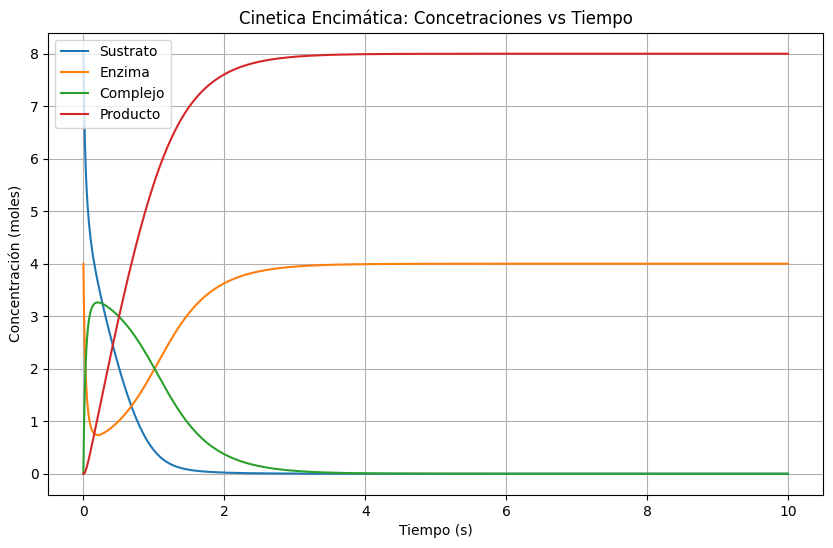

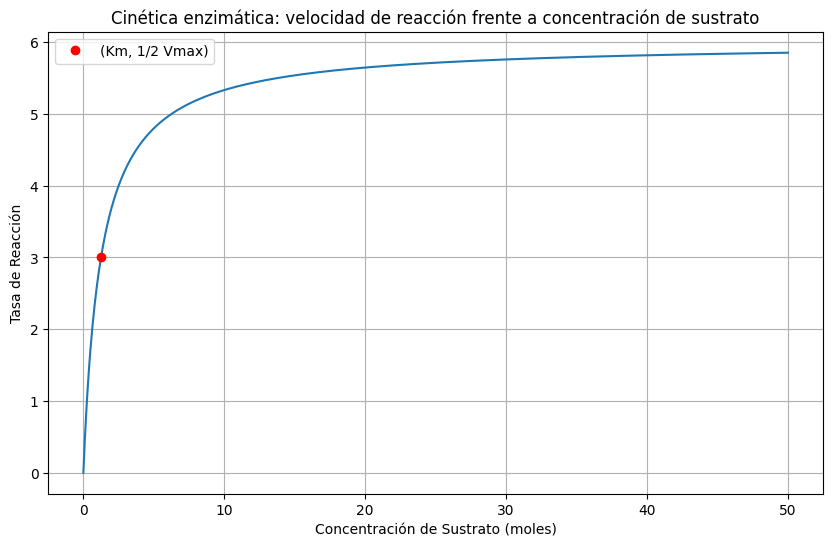

Vmax: 6.0000
1/2 Vmax: 3.0000
Km: 1.2500


In [15]:
# Simulación 3 (modificando tasas de cambio)
print("\nSimulación 3:")
S0, E0 = 8, 4
S_max, dt, t_max = 50, 0.01, 10
constants = 3, 2, 0.5   # Nuevas tasas de cambio
simulate(S0, E0, S_max, dt, t_max, constants)

1. **Dinámica de reacción inicial**:
- La simulación comienza con concentraciones iniciales de 8 moles para el sustrato (S0) y 4 moles para la enzima (E0), más bajas que en la Simulación 2 pero similares a la Simulación 1.
- Hay una disminución inicial muy rápida en la concentración del sustrato, más pronunciada que en simulaciones anteriores debido a las constantes de velocidad modificadas.
- El complejo enzima-sustrato se forma rápidamente pero alcanza un pico más bajo que en simulaciones anteriores.

2. **Estado estable**:
- El sistema alcanza un estado estable mucho más rápido, después de aproximadamente 2-3 segundos.
- Este equilibrio más rápido probablemente se deba a la constante de velocidad de avance aumentada (k1 = 3) y la mayor tasa de formación del producto (k2 = 2).

3. **Formación del producto**:
- La concentración del producto aumenta muy rápidamente al principio, más rápido que en simulaciones anteriores.
- Se estabiliza en aproximadamente 8 moles, lo que coincide con la concentración inicial de sustrato, lo que indica una conversión completa.

4. **Saturación de la enzima**:
- El pico del complejo enzima-sustrato es más bajo y más estrecho que en simulaciones anteriores.
- Esto sugiere un breve período de saturación de la enzima antes de que se produzca una rápida formación del producto y el agotamiento del sustrato.

5. **Velocidad de reacción**:
- La curva cinética de Michaelis-Menten en el segundo gráfico muestra una Vmax más baja (alrededor de 6 moles/s) en comparación con simulaciones anteriores.
- El valor de Km (concentración de sustrato a la mitad de la Vmax) parece ser más alto, lo que indica una menor afinidad de la enzima por el sustrato.

6. **Eficiencia**:
- La reacción se completa mucho más rápido que en simulaciones anteriores, lo que demuestra una eficiencia muy alta.
- Todo el sustrato se convierte en producto en menos de la mitad del tiempo en comparación con las simulaciones 1 y 2.

7. **Constantes de velocidad**:
- Las nuevas constantes de velocidad (k1 = 3, k2 = 2, k3 = 0,5) alteran significativamente la cinética de la reacción:
- Un valor k1 más alto conduce a una formación inicial del complejo más rápida
- Un valor k2 más alto da como resultado una formación del producto más rápida
- Un valor k3 más bajo reduce la reacción inversa, lo que favorece la formación del producto

En comparación con las simulaciones anteriores, esta simulación muestra:
- Velocidades de reacción iniciales mucho más rápidas
- Pico del complejo enzima-sustrato más bajo y más breve
- Tiempo significativamente más rápido para alcanzar el estado estable
- Velocidad máxima de reacción general más baja (Vmax) pero finalización más rápida
- Km más alto, lo que sugiere una afinidad enzimática más baja pero una renovación más rápida